### **Assignment 1 Notebook**

This is the supporting Jupyter Notebook for Assignment 1. Here we will use the King County (USA) *House Data* dataset available via [Kaggle](https://www.kaggle.com/datasets/shivachandel/kc-house-data) .

The original dataset contains 21 variables and 21613 observations. We will use 11 of those variables and our aim is to model house prices.



In [2]:
file = "kc_house_data.csv"
HouseData = read.csv(file,header=TRUE)

In [3]:
HouseData =  subset(HouseData, select = c(id, price, bedrooms, bathrooms,
                    sqft_living, sqft_lot, floors,
                    yr_built, zipcode, lat, long))
dim(HouseData) #this should return 21613, 11
names(HouseData) #this should return id, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, yr_built, zipcode, lat, lon

[1] 21613    11

[1] "id"          "price"       "bedrooms"    "bathrooms"   "sqft_living"
 [6] "sqft_lot"    "floors"      "yr_built"    "zipcode"     "lat"        
[11] "long"

In [4]:
head(HouseData)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,zipcode,lat,long
,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,7129300520,221900,3,1.00,1180,5650,1,1955,98178,47.5112,-122.257
2,6414100192,538000,3,2.25,2570,7242,2,1951,98125,47.7210,-122.319
3,5631500400,180000,2,1.00,770,10000,1,1933,98028,47.7379,-122.233
4,2487200875,604000,4,3.00,1960,5000,1,1965,98136,47.5208,-122.393
5,1954400510,510000,3,2.00,1680,8080,1,1987,98074,47.6168,-122.045
6,7237550310,1225000,4,4.50,5420,101930,1,2001,98053,47.6561,-122.005


Using an appropriate function from the **leaps** library, perform forward subset selection to find a suitable set of variables to estimate house prices. Uncomment the second line in this block and replace **NULL** with the function call you have written.

In [6]:
library(leaps)
#best_forward = NULL #Replace this with the relevant function call
summary(best_forward) #print the summary for the best_forward output

Subset selection object
Call: regsubsets.formula(price ~ ., data = HouseData, method = "forward", 
    nvmax = 10)
10 Variables  (and intercept)
            Forced in Forced out
id              FALSE      FALSE
bedrooms        FALSE      FALSE
bathrooms       FALSE      FALSE
sqft_living     FALSE      FALSE
sqft_lot        FALSE      FALSE
floors          FALSE      FALSE
yr_built        FALSE      FALSE
zipcode         FALSE      FALSE
lat             FALSE      FALSE
long            FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: forward
          id  bedrooms bathrooms sqft_living sqft_lot floors yr_built zipcode
1  ( 1 )  " " " "      " "       "*"         " "      " "    " "      " "    
2  ( 1 )  " " " "      " "       "*"         " "      " "    " "      " "    
3  ( 1 )  " " " "      " "       "*"         " "      " "    "*"      " "    
4  ( 1 )  " " "*"      " "       "*"         " "      " "    "*"      " "    
5  ( 1 )  " " "*"      "*"       "*"     

In [7]:
forward_summary = summary(best_forward) #save the summary to forward_summary
forward_adjr2 = which.max(forward_summary$adjr2) #choose the model with the maximum adjusted R2
print(coef(best_forward,forward_adjr2)) #print the coefficients for the model with the highest adj R2

 (Intercept)     bedrooms    bathrooms  sqft_living       floors     yr_built 
4670008.8223  -62257.3375   55882.7496     296.5165   37722.8361   -2456.7629 
     zipcode          lat         long 
   -671.6835  643749.1855 -289586.8936 


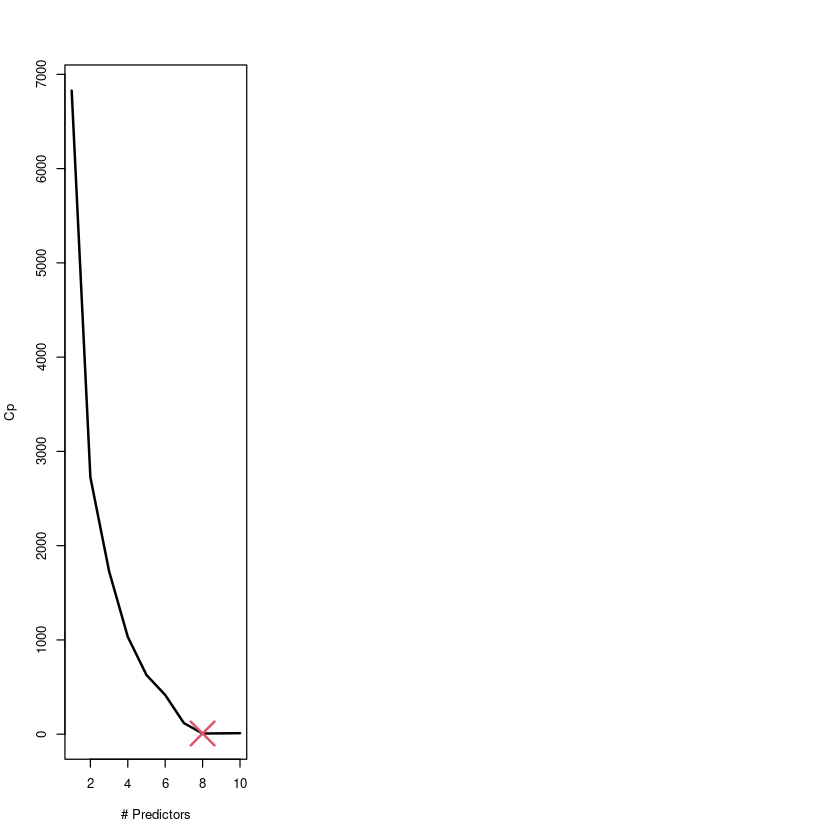

In [8]:
par(mfrow = c(1,3)) #allows for 3 plots to be plotted side by side

plot(forward_summary$cp,
     xlab = "# Predictors", #x-axis label
     ylab = "Cp", #y-axis label
     type = "l", #line plot
     lwd = 2) #line thickness

cp_min = which.min(forward_summary$cp)

#overlay the minimum of cp on the previous plot using the points function
points(cp_min,
       forward_summary$cp[cp_min],
       pch = 4, #cross symbol used
       col = 2, #red colour
       cex = 4, #make it bigger!
       lwd = 2) #make the cross lines thicker

# ADD CODE HERE TO PLOT BIC AND ADJUSTED R^2